In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


import sys
path_to_mavenn_local = '/Users/jkinney/github/mavenn'
sys.path.insert(0,path_to_mavenn_local)

import mavenn
from mavenn.src.utils import get_example_dataset

In [2]:
import re
import logomaker

def get_additive_params_for_logomaker(self):
    """
    Returns a pd.DataFrame listing additive model parameters
    in a format suitable for creating logos with logomaker. 
    
    Schematic usage:
    
    import mavenn
    import logomaker
    model = mavenn.load('...')
    param_df = model.get_additive_params_for_logomaker()
    logomaker.Logo(param_df)
    """
    
    # Get G-P map parameters
    df = self.get_gpmap_parameters()

    # Define regular expression for extracting additive parameters
    pattern = re.compile('^theta_([0-9]+):([A-Z])$')
    
    # Filter out positions that do not correspond to additive parameters
    matches = [pattern.match(name) for name in df['name']]
    ix = [bool(m) for m in matches]
    df = df[ix]

    # Parse position and characters from parameter names
    matches = [pattern.match(name) for name in df['name']]
    df['pos'] = [int(m.group(1)) for m in matches]
    df['char'] = [m.group(2) for m in matches]

    # Create logomaker-compatible dataframe
    df = df.pivot(index='pos', columns='char', values='value')
    df.sort_values(by="pos", inplace=True)
    df.columns.name = None

    return df

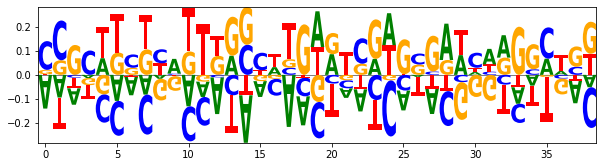

In [3]:
# Load model
model = mavenn.load('model_files/NAR_sort_seq',regression_type='NA')

# Get dataframe with additive parameters in logomaker format
logo_df = get_additive_params_for_logomaker(model)

# Make logo
logomaker.Logo(logo_df)

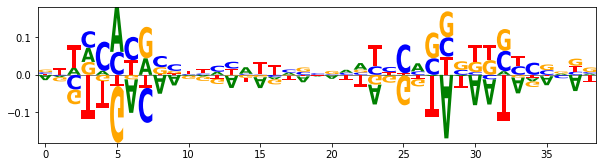

In [4]:
theta_df = pd.DataFrame(model.get_nn().layers[2].get_weights()[0].reshape(39,4),columns=['A','C','G','T'])
logomaker.Logo(theta_df)